In [25]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import json
import csv

In [4]:
os.chdir("/Users/ericaxia/Downloads/Github/554_Project_Code/Project/")
csv_files = []
myfile = "share_by_occupation_female.txt"
# text file where I specify which files I want to use
with open(myfile, "r") as f:
    lines = f.readlines()
    for l in lines:    
        file = l.rstrip("\n") + ".csv"
        csv_files.append(file)
print(csv_files)

['SEOFE0AB.csv', 'SEOFE15A.csv', 'SEOFE15B.csv', 'SEOFE2AB.csv', 'SEOFE3AB.csv', 'SEOFE4AB.csv', 'SEOFE5AB.csv', 'SEOFE6AB.csv', 'SEOFE7AB.csv', 'SEOFE8AB.csv', 'SEOFE9AB.csv']


In [5]:
# Read csv files from No Ceilings project folder
path = "/Users/ericaxia/Downloads/Github/project-girlboss/data/noceilings-data-master/csv"
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
# print(result)
# Narrow down to just the files I want
result2 = [f for f in result if f in csv_files]
dfs = []
for f in result2:
    df = pd.read_csv(f)
    dfs.append((f, df))    
print(f"Using {len(dfs)} csv files")

Using 11 csv files


In [6]:
df = dfs[0][1]
df.head()
# df.tail(10)
# ## gets rid of text dscrip at bottom
# df_us = df_us.iloc[0:121, :]
# # df_us.tail()
col_nulls = df.isna().sum().sort_values()
c = col_nulls.to_frame()
c.reset_index(inplace=True)
c.columns = ['Country', 'Num Nulls']
print(c.iloc[0:4])
# ## pick a year with low amonut of nans
# ## e.g. 2012 

  Country  Num Nulls
0     ISO          0
1    2012          7
2    2011         11
3    2009         43


In [7]:
# # Which year has least amount of missing data?
# for tup in dfs:
#     print(tup[0])
#     df_us = tup[1]
#     df_us = df_us.iloc[0:121, :]
#     col_nulls = df_us.isna().sum().sort_values()
#     c = col_nulls.to_frame()
#     c.reset_index(inplace=True)
#     c.columns = ['Country', 'Num Nulls']
#     print(c.iloc[0:4])
#     ## pick a year with low amonut of nans
#     ## e.g. 2012 seems like year that all DFs have low nans


## Let's narrow down to a chosen year

In [8]:
os.chdir("/Users/ericaxia/Downloads/Github/554_Project_Code/Project/d3layout_data")

In [9]:

year = '2012'  # chosen year to graph

json_names = []
dfs_to_plot = []

for i in range(len(dfs)):
    # as a test, use first df for now
    name = dfs[i][0].strip(".csv")
    df = dfs[i][1]
    # df = df.iloc[0:121, :] # TODO: better way to get rid of bottom text?
    df = df[['ISO', year]]

    # drop nans
    df.dropna(inplace=True)
    
    df.columns = ['name', 'value']
    # df.head()
    
    dfs_to_plot.append((name, df))
    # print(df.shape)
    df.to_json(f"{name}.json", orient='records')
    print(f"Exported {name} data with shape {df.shape}")
    json_names.append(f"{name}.json")

Exported SEOFE15A data with shape (37, 2)
Exported SEOFE15B data with shape (1, 2)
Exported SEOFE9AB data with shape (38, 2)
Exported SEOFE8AB data with shape (38, 2)
Exported SEOFE6AB data with shape (37, 2)
Exported SEOFE4AB data with shape (38, 2)
Exported SEOFE0AB data with shape (28, 2)
Exported SEOFE2AB data with shape (38, 2)
Exported SEOFE5AB data with shape (38, 2)
Exported SEOFE7AB data with shape (38, 2)
Exported SEOFE3AB data with shape (38, 2)


/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
name = dfs_to_plot[0][0]
df = dfs_to_plot[0][1]
print(name)

df.columns = ['name', 'value']
df.head()

SEOFE15A


,name,value
0,AUT,2.9
1,BEL,5.8
2,BGR,4.7
4,HRV,2.5
5,CYP,1.3


SEOFE15A


<AxesSubplot:title={'center':'Percent of Female Managers, by Country'}, xlabel='name', ylabel='value'>

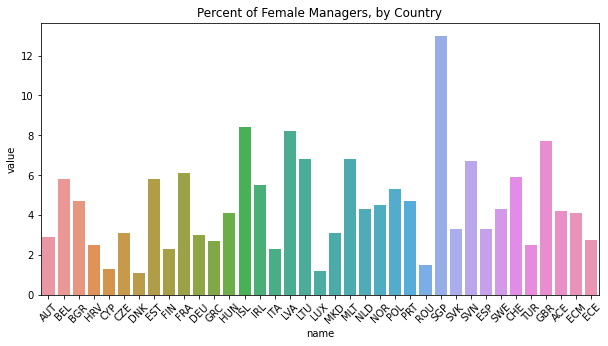

In [11]:
print(name)
plt.figure(figsize=(10,5))
plt.title("Percent of Female Managers, by Country")
plt.xticks(rotation = 45)
sns.barplot(data=df, x='name', y='value')

# Ideal nested JSON format as final product
That we can plug right into the zoomable circle packing chart 
Let names = country or code code, values = percentage 

```
{
    "name": "education",
    "children": [
        {
            "name": "Primary School Education, Women age 25+",
            "children": [
                {
                    "value": 95,
                    "name": "USA"
                },
                ...
            ]
        },
        {
            "name": "Secondary School Education, Women age 25+",
            "children": [
                {
                    "value": 96,
                    "name": "USA"
                },
                ...
            ]
        },
        ...
    ]
}

```

In [12]:
## continue where i left off

In [17]:
# Read back in the json files saved
os.chdir("/Users/ericaxia/Downloads/Github/554_Project_Code/Project/d3layout_data")
extension = 'json'
result = glob.glob('*.{}'.format(extension))
# Narrow down to just the files I want
result2 = [f for f in result if f in json_names]
# print(len(result2))

['SEOFE9AB.json', 'SEOFE5AB.json', 'SEOFE15A.json', 'SEOFE7AB.json', 'SEOFE3AB.json', 'SEOFE8AB.json', 'SEOFE4AB.json', 'SEOFE6AB.json', 'SEOFE2AB.json', 'SEOFE15B.json', 'SEOFE0AB.json']


In [30]:
# import csv file with full dataset name mappings
with open('data_names.csv', mode='r') as infile:
    reader = csv.reader(infile)
    dataset_names = {rows[0]: rows[1] for rows in reader}
    # print(dataset_names)


In [33]:
# Create big json file

export_file = { "name": "employment", "children": [] }

for f in result2:
    ds_code = f.split('.json')[0]
    ds_name = dataset_names[ds_code]
    # print(ds_name)
    with open(f, "r") as read_file:
        data = json.load(read_file)  # list of dicts
        inner_dict = { "name": ds_name, "children": data }
        export_file["children"].append(inner_dict)
        


In [35]:
# export_file

2

In [36]:
with open("female_employment_data.json", "w") as write_file:
    json.dump(export_file, write_file)